In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Exp 2022 (1A)

In [310]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'exp2022_relativeDecrease'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
exp2022 = pd.read_csv(url)

In [263]:
exp2022

,Family,ENU,Time,fH+,hH+,fH-,hH-,RelativeDecrease
0,1x1,0.0,30,242,140,146,67,1.261
1,1x1,1.5,30,334,184,244,48,2.800
2,1x1,2.0,30,185,93,176,38,2.328
3,1x1,0.0,40,229,161,146,67,1.532
4,1x1,1.5,40,200,25,244,48,0.635
5,1x1,2.0,40,147,11,176,38,0.347
6,1x1,0.0,50,283,5,146,67,0.039
7,1x1,1.5,50,218,107,244,48,2.495
8,1x1,2.0,50,108,19,176,38,0.815
9,1x2,0.0,30,222,118,63,34,0.985


In [311]:
exp2022['H+_fraction'] = exp2022['hH+'] / exp2022['fH+'] * 100
exp2022['H-_fraction'] = exp2022['hH-'] / exp2022['fH-'] * 100

exp2022_melted = pd.melt(exp2022, id_vars=['Family', 'ENU', 'Time'], value_vars=['H+_fraction', 'H-_fraction'], var_name='Code', value_name='Percent')
exp2022_melted['Heat_shock'] = exp2022_melted['Code'].apply(lambda x: x[0:2])
exp2022_melted['HM'] = exp2022_melted['Heat_shock'] + ' M' + exp2022_melted['ENU'].map(str)
exp2022_melted['ENU_Time'] = exp2022_melted['ENU'].map(str) + ' mM ' + exp2022_melted['Time'].map(str) + ' min'

exp2022_melted

,Family,ENU,Time,Code,Percent,Heat_shock,HM,ENU_Time
0,1x1,0.0,30,H+_fraction,57.851240,H+,H+ M0.0,0.0 mM 30 min
1,1x1,1.5,30,H+_fraction,55.089820,H+,H+ M1.5,1.5 mM 30 min
2,1x1,2.0,30,H+_fraction,50.270270,H+,H+ M2.0,2.0 mM 30 min
3,1x1,0.0,40,H+_fraction,70.305677,H+,H+ M0.0,0.0 mM 40 min
4,1x1,1.5,40,H+_fraction,12.500000,H+,H+ M1.5,1.5 mM 40 min
...,...,...,...,...,...,...,...,...
67,2x2,1.5,40,H-_fraction,90.625000,H-,H- M1.5,1.5 mM 40 min
68,2x2,2.0,40,H-_fraction,70.860927,H-,H- M2.0,2.0 mM 40 min
69,2x2,0.0,50,H-_fraction,96.774194,H-,H- M0.0,0.0 mM 50 min
70,2x2,1.5,50,H-_fraction,90.625000,H-,H- M1.5,1.5 mM 50 min


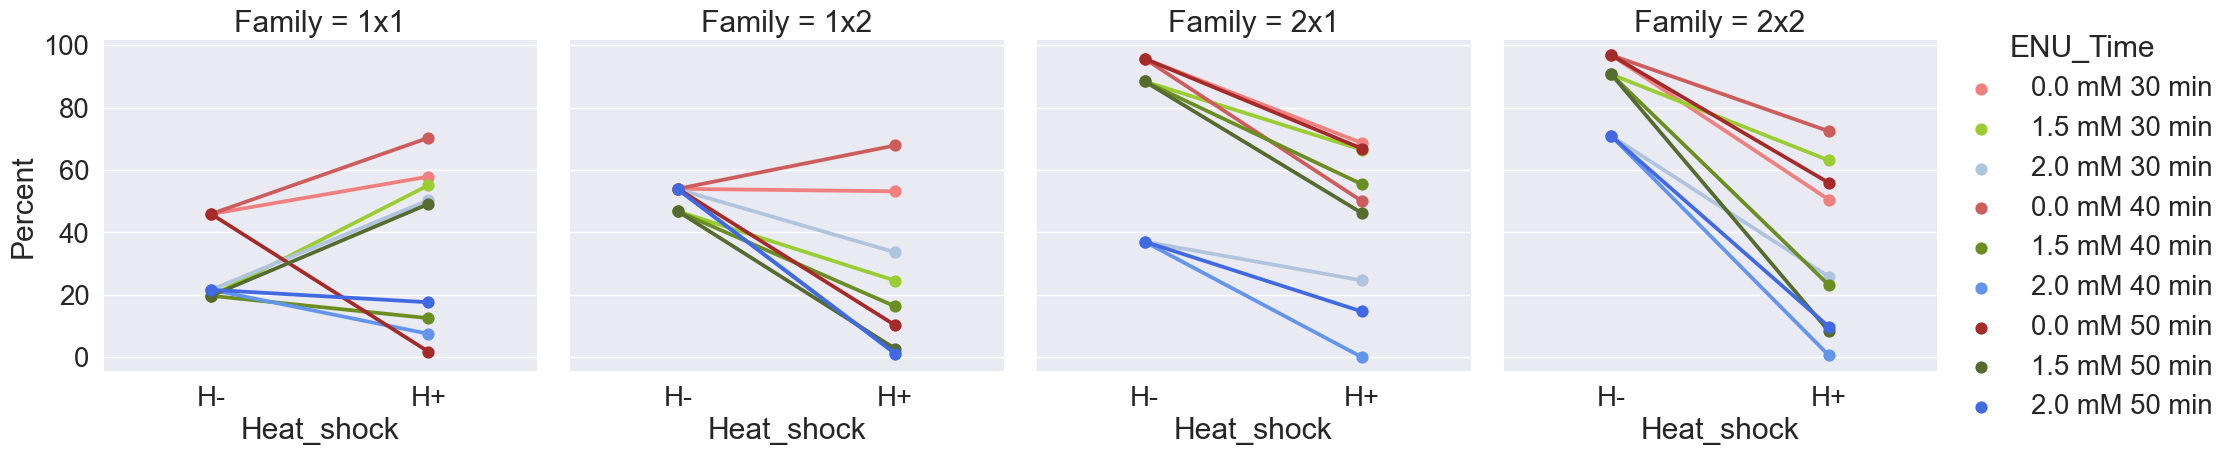

In [313]:
sns.set_style('darkgrid')
exp2022_plot = sns.catplot(data=exp2022_melted, x='Heat_shock', y='Percent', hue='ENU_Time', col='Family',
                          kind="point", order=['H-', 'H+'],
                          palette={'0.0 mM 30 min': 'lightcoral', '0.0 mM 40 min': 'indianred', '0.0 mM 50 min': 'brown', 
                                  '1.5 mM 30 min': 'yellowgreen', '1.5 mM 40 min': 'olivedrab', '1.5 mM 50 min': 'darkolivegreen', 
                                  '2.0 mM 30 min': 'lightsteelblue', '2.0 mM 40 min': 'cornflowerblue', '2.0 mM 50 min': 'royalblue'})

#### Relative decrease

In [314]:
exp2022_melted['Mut'] = exp2022_melted['ENU'].apply(lambda x: 'M-' if x == 0.0 else 'M+')

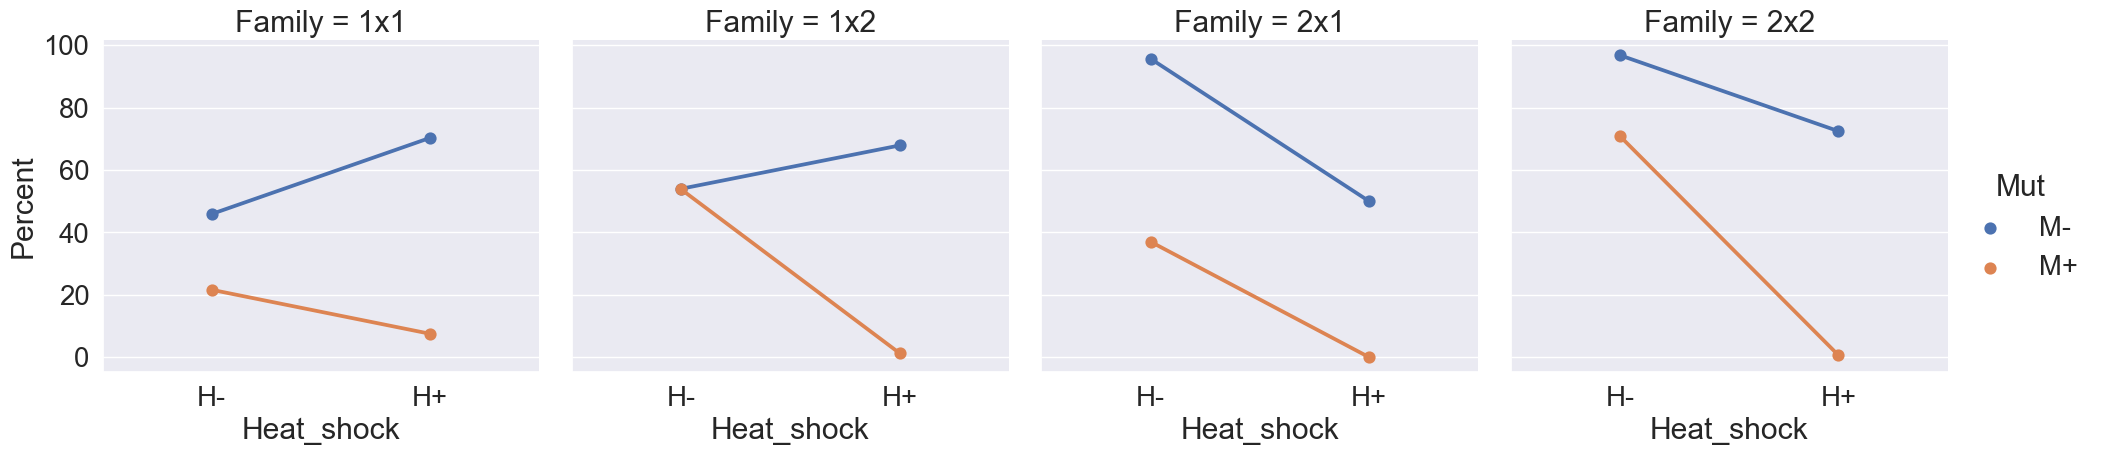

In [315]:
sns.set_style('darkgrid')
exp2022_plot = sns.catplot(data=exp2022_melted[(exp2022_melted['ENU_Time'] == '2.0 mM 40 min') | (exp2022_melted['ENU_Time'] == '0.0 mM 40 min')], 
                           x='Heat_shock', y='Percent', hue='Mut', col='Family',
                           kind="point", order=['H-', 'H+'])

#### AK version

In [267]:
exp2022_ak_plot = exp2022_melted.loc[:,:]

exp2022_ak_plot = pd.DataFrame(np.repeat(exp2022_ak_plot.values, 2, axis=0))
exp2022_ak_plot.columns = exp2022_melted.columns
exp2022_ak_plot['Stage']=np.where(exp2022_ak_plot.index%2==0, 'Fertilisation', 'Hatching')
exp2022_ak_plot.loc[exp2022_ak_plot['Stage'] == 'Fertilisation', 'Fraction'] = 100

exp2022_ak_plot['HM_short'] = exp2022_ak_plot['Heat_shock'] + exp2022_ak_plot['Mut']

In [269]:
exp2022_ak_plot

,Family,ENU,Time,Code,Fraction,Heat_shock,HM,ENU_Time,Mut,Stage,HM_short
0,1x1,0.0,30,H+_fraction,100,H+,H+ M0.0,0.0 mM 30 min,M-,Fertilisation,H+M-
1,1x1,0.0,30,H+_fraction,57.85124,H+,H+ M0.0,0.0 mM 30 min,M-,Hatching,H+M-
2,1x1,1.5,30,H+_fraction,100,H+,H+ M1.5,1.5 mM 30 min,M+,Fertilisation,H+M+
3,1x1,1.5,30,H+_fraction,55.08982,H+,H+ M1.5,1.5 mM 30 min,M+,Hatching,H+M+
4,1x1,2.0,30,H+_fraction,100,H+,H+ M2.0,2.0 mM 30 min,M+,Fertilisation,H+M+
...,...,...,...,...,...,...,...,...,...,...,...
139,2x2,0.0,50,H-_fraction,96.774194,H-,H- M0.0,0.0 mM 50 min,M-,Hatching,H-M-
140,2x2,1.5,50,H-_fraction,100,H-,H- M1.5,1.5 mM 50 min,M+,Fertilisation,H-M+
141,2x2,1.5,50,H-_fraction,90.625,H-,H- M1.5,1.5 mM 50 min,M+,Hatching,H-M+
142,2x2,2.0,50,H-_fraction,100,H-,H- M2.0,2.0 mM 50 min,M+,Fertilisation,H-M+


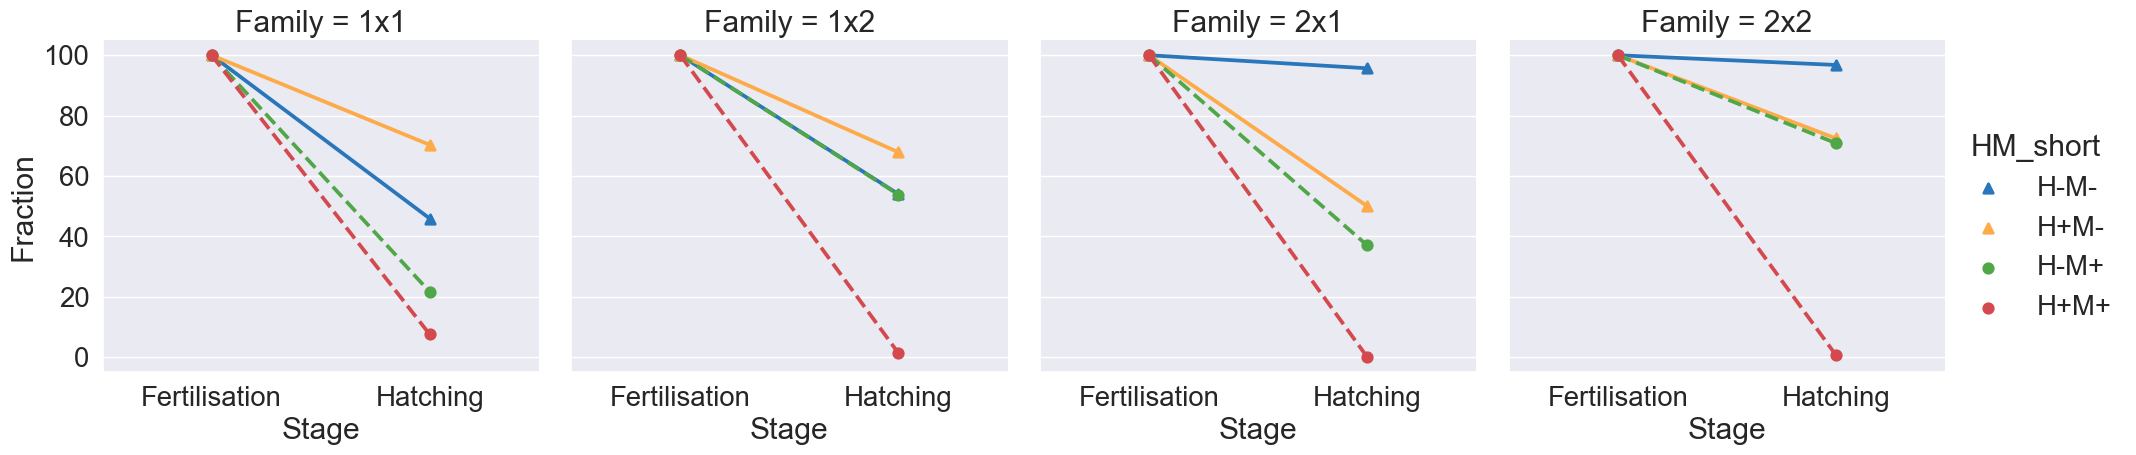

In [319]:
sns.set_style('darkgrid')
exp2022_plot_with_whiskers = sns.catplot(data=exp2022_ak_plot[(exp2022_ak_plot['ENU_Time'] == '2.0 mM 40 min') | (exp2022_ak_plot['ENU_Time'] == '0.0 mM 40 min')], 
                                         x='Stage', y='Fraction', hue='HM_short', col='Family',
                                         hue_order=['H-M-', 'H+M-', 'H-M+', 'H+M+'], 
                                         kind="point", linestyles=["-", "-", "--", '--'], markers=['^', '^', 'o', 'o'],
                                        palette={'H-M-': '#2976bb', 'H+M-': '#fdaa48', 'H-M+': '#50a747', 'H+M+': '#d3494e'})

## Table 5 (1B)

In [119]:
exp5lab = pd.read_csv('../data/2023_derived_tables/exp5lab_sum.csv')

In [120]:
exp5lab

,FAMILY,MUT,TEMP,TIME,fH+,fH-,hH+,hH-,sH+,sH-,RelativeDecreaseHatched,RelativeDecreaseSwim
0,1x1,C,38,40,181,150,114,141,100,124,0.670036,0.668330
1,1x1,M,38,40,228,110,90,89,30,60,0.487877,0.241228
2,1x2,C,38,40,126,156,67,128,63,121,0.648065,0.644628
3,1x2,M,38,40,145,175,82,141,49,122,0.701883,0.484737
4,2x1,C,38,40,142,151,127,150,95,113,0.900329,0.893992
5,2x1,M,38,40,240,174,192,163,122,119,0.853988,0.743277
6,2x2,C,38,40,150,147,133,136,122,137,0.958382,0.872701
7,2x2,M,38,40,191,153,173,116,161,106,1.194665,1.216685


In [121]:
exp5lab_melted = pd.melt(exp5lab, id_vars=['FAMILY', 'MUT'], value_vars=['fH+', 'hH+', 'sH+', 'fH-', 'hH-', 'sH-'], var_name='Code', value_name='Count')
exp5lab_melted['Stage'] = exp5lab_melted['Code'].apply(lambda x: x[0])
exp5lab_melted['Stage'] = exp5lab_melted['Stage'].replace({'f': 'Fertilisation', 'h': 'Hatching', 's': 'Swimming'})
exp5lab_melted['Heat_shock'] = exp5lab_melted['Code'].apply(lambda x: x[1:])

In [122]:
exp5lab_melted

,FAMILY,MUT,Code,Count,Stage,Heat_shock
0,1x1,C,fH+,181,Fertilisation,H+
1,1x1,M,fH+,228,Fertilisation,H+
2,1x2,C,fH+,126,Fertilisation,H+
3,1x2,M,fH+,145,Fertilisation,H+
4,2x1,C,fH+,142,Fertilisation,H+
5,2x1,M,fH+,240,Fertilisation,H+
6,2x2,C,fH+,150,Fertilisation,H+
7,2x2,M,fH+,191,Fertilisation,H+
8,1x1,C,hH+,114,Hatching,H+
9,1x1,M,hH+,90,Hatching,H+


In [123]:
exp5lab_melted['MUT'] = exp5lab_melted['MUT'].replace({'M':'M+', 'C':'M-'})
exp5lab_melted['HM'] = exp5lab_melted[['MUT', 'Heat_shock']].apply(lambda row: f"{row.Heat_shock}{row.MUT}", axis=1)

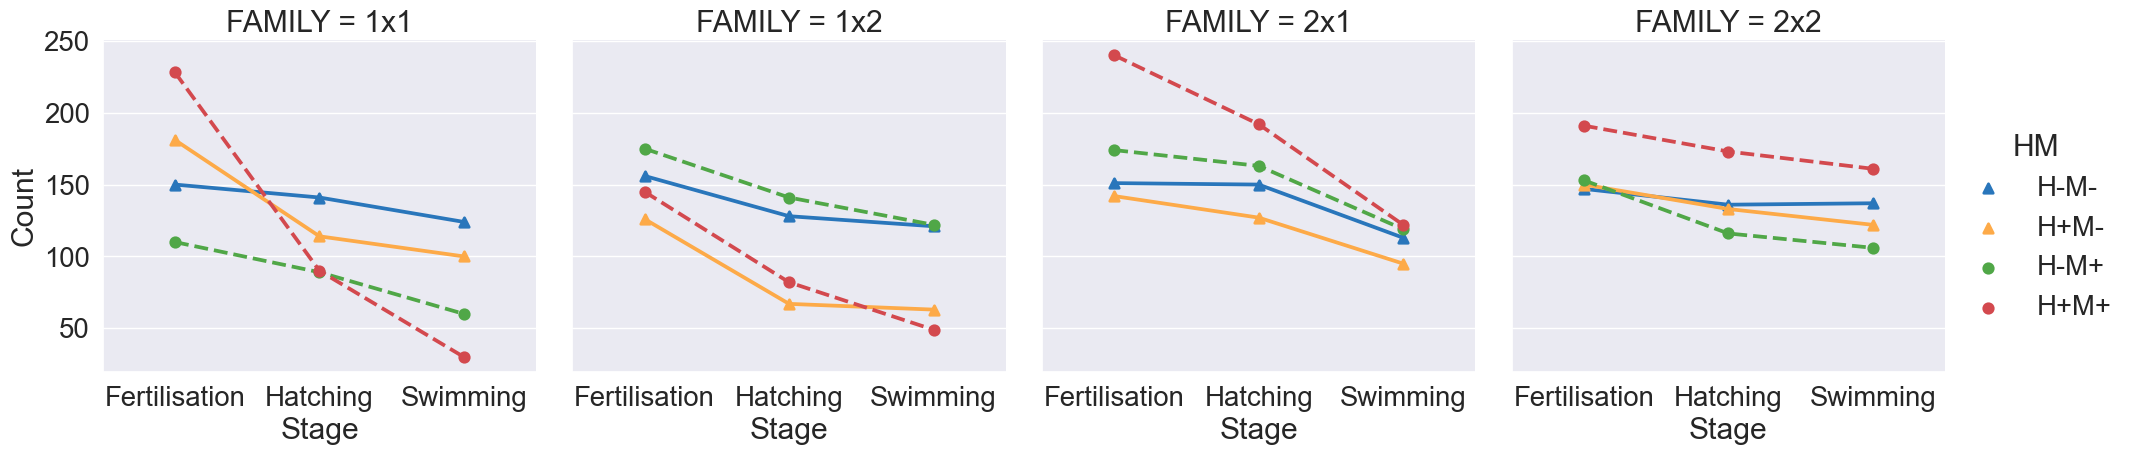

In [320]:
sns.set_style('darkgrid')
sns.set(font_scale=1.8)
exp5lab_plot = sns.catplot(data=exp5lab_melted, x='Stage', y='Count', hue='HM', col='FAMILY',
                           hue_order=['H-M-', 'H+M-', 'H-M+', 'H+M+'],
                          kind="point", linestyles=["-", "-", "--", '--'], markers=['^', '^', 'o', 'o'], 
                          palette={'H-M-': '#2976bb', 'H+M-': '#fdaa48', 'H-M+': '#50a747', 'H+M+': '#d3494e'})

In [52]:
exp5lab

,FAMILY,MUT,TEMP,TIME,fH+,fH-,hH+,hH-,sH+,sH-,RelativeDecreaseHatched,RelativeDecreaseSwim
0,1x1,C,38,40,181,150,114,141,100,124,0.670036,0.668330
1,1x1,M,38,40,228,110,90,89,30,60,0.487877,0.241228
2,1x2,C,38,40,126,156,67,128,63,121,0.648065,0.644628
3,1x2,M,38,40,145,175,82,141,49,122,0.701883,0.484737
4,2x1,C,38,40,142,151,127,150,95,113,0.900329,0.893992
5,2x1,M,38,40,240,174,192,163,122,119,0.853988,0.743277
6,2x2,C,38,40,150,147,133,136,122,137,0.958382,0.872701
7,2x2,M,38,40,191,153,173,116,161,106,1.194665,1.216685


In [177]:
exp5lab_norm = exp5lab.loc[:,:]
exp5lab_norm['hatched_fraction_H+'] = exp5lab_norm['hH+'] / exp5lab_norm['fH+']
exp5lab_norm['hatched_fraction_H-'] = exp5lab_norm['hH-'] / exp5lab_norm['fH-']
exp5lab_norm['swim_fraction_H+'] = exp5lab_norm['sH+'] / exp5lab_norm['fH+']
exp5lab_norm['swim_fraction_H-'] = exp5lab_norm['sH-'] / exp5lab_norm['fH-']

exp5lab_norm = pd.melt(exp5lab_norm, id_vars=['FAMILY', 'MUT'], value_vars=['hatched_fraction_H+', 'hatched_fraction_H-', 'swim_fraction_H+', 'swim_fraction_H-'], var_name='Stage', value_name='Fraction')
exp5lab_norm['Heat_shock'] = exp5lab_norm['Stage'].apply(lambda x: x[-2:])
exp5lab_norm['Stage'] = exp5lab_norm['Stage'].apply(lambda x: x[:-3])
exp5lab_norm['MUT'] = exp5lab_norm['MUT'].apply(lambda x: 'M-' if x == 'C' else 'M+')

exp5lab_norm

,FAMILY,MUT,Stage,Fraction,Heat_shock
0,1x1,M-,hatched_fraction,0.629834,H+
1,1x1,M+,hatched_fraction,0.394737,H+
2,1x2,M-,hatched_fraction,0.531746,H+
3,1x2,M+,hatched_fraction,0.565517,H+
4,2x1,M-,hatched_fraction,0.894366,H+
5,2x1,M+,hatched_fraction,0.800000,H+
6,2x2,M-,hatched_fraction,0.886667,H+
7,2x2,M+,hatched_fraction,0.905759,H+
8,1x1,M-,hatched_fraction,0.940000,H-
9,1x1,M+,hatched_fraction,0.809091,H-


In [198]:
exp5lab_norm['Stage'] = exp5lab_norm['Stage'].apply(lambda x: 'Hatching' if x == 'hatched_fraction' else 'Swimming')

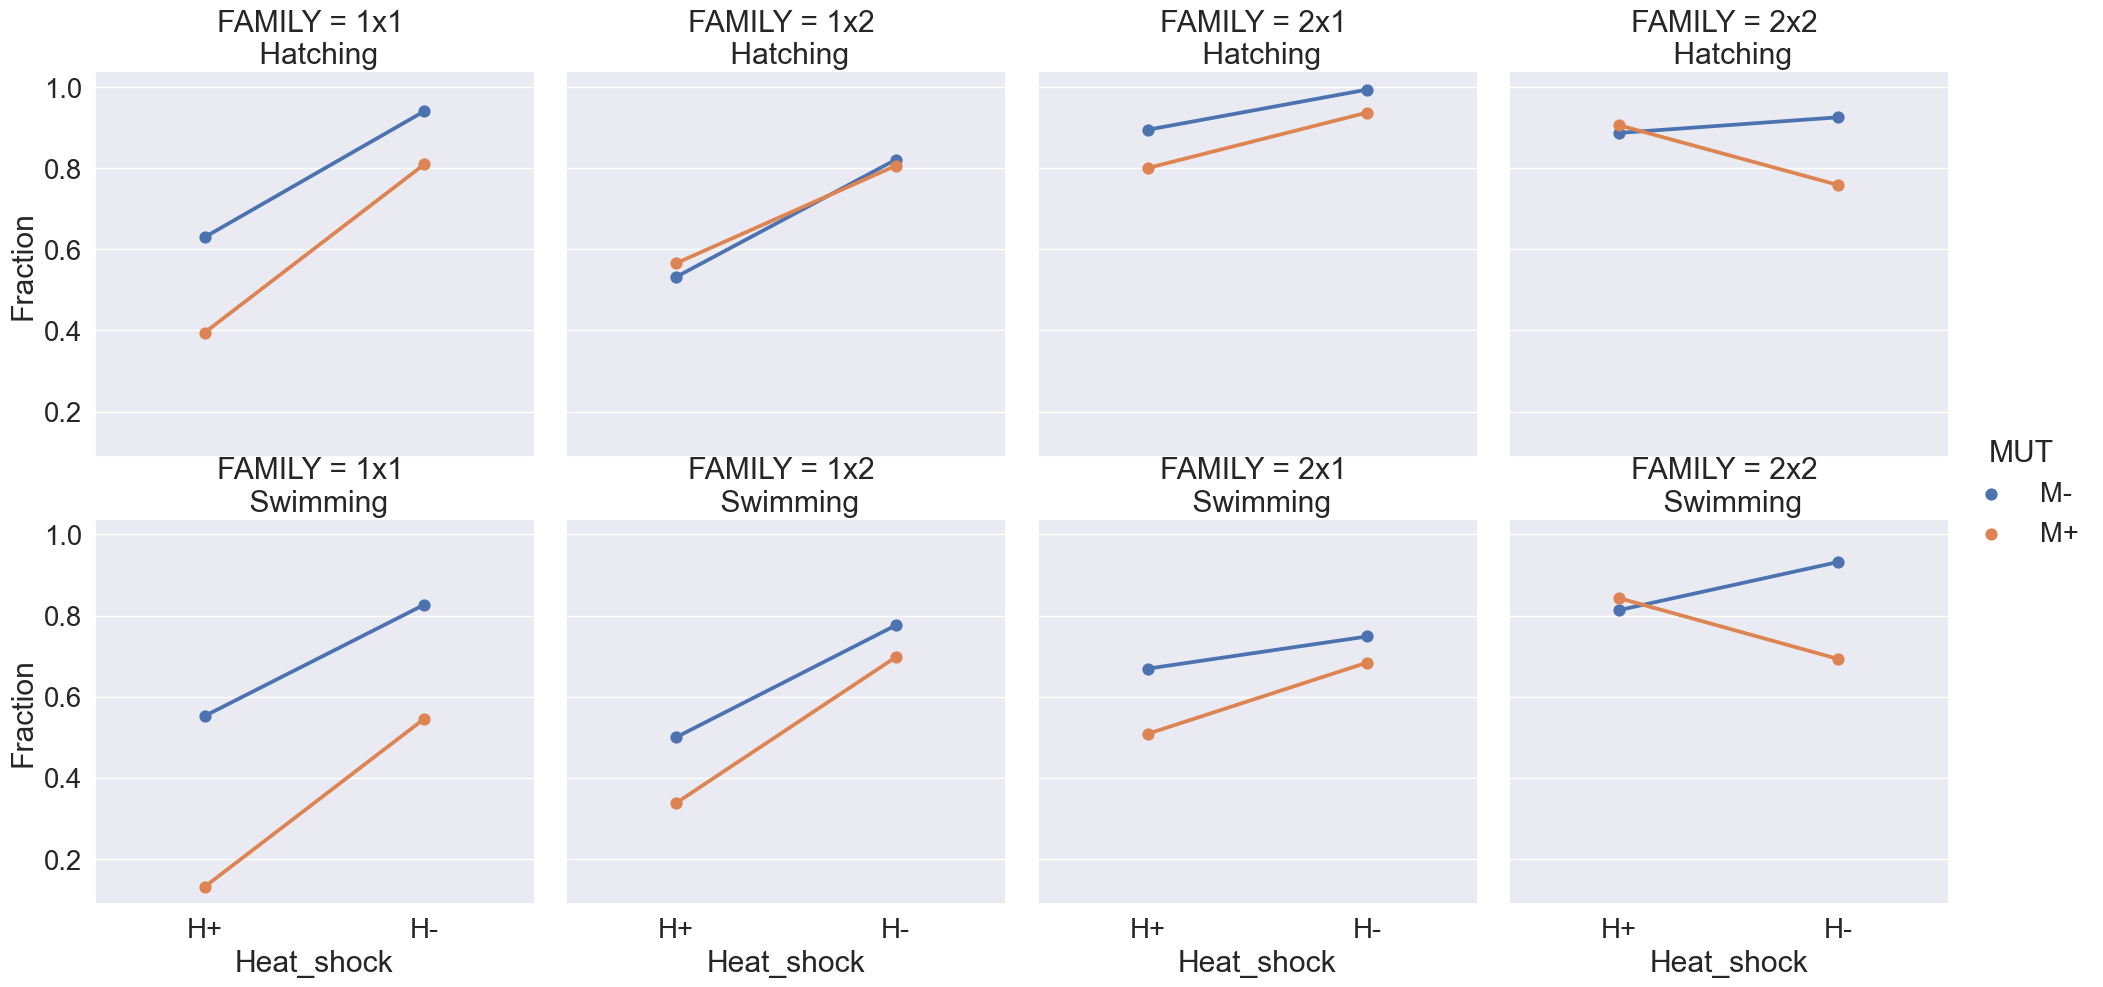

In [201]:
sns.set(font_scale=1.8)
exp5lab_norm_plot = sns.catplot(data=exp5lab_norm, x='Heat_shock', y='Fraction', hue='MUT', row='Stage', col='FAMILY',
                          kind="point").set_titles('FAMILY = ''{col_name}' ' \n ' '{row_name}')


In [49]:
exp5lab_rd = pd.melt(exp5lab, id_vars=['FAMILY', 'MUT'], value_vars=['RelativeDecreaseHatched', 'RelativeDecreaseSwim'], var_name='Stage', value_name='Relative decrease')
exp5lab_rd['Stage'] = exp5lab_rd['Stage'].replace({'RelativeDecreaseHatched': 'Hatching', 'RelativeDecreaseSwim': 'Swimming'})

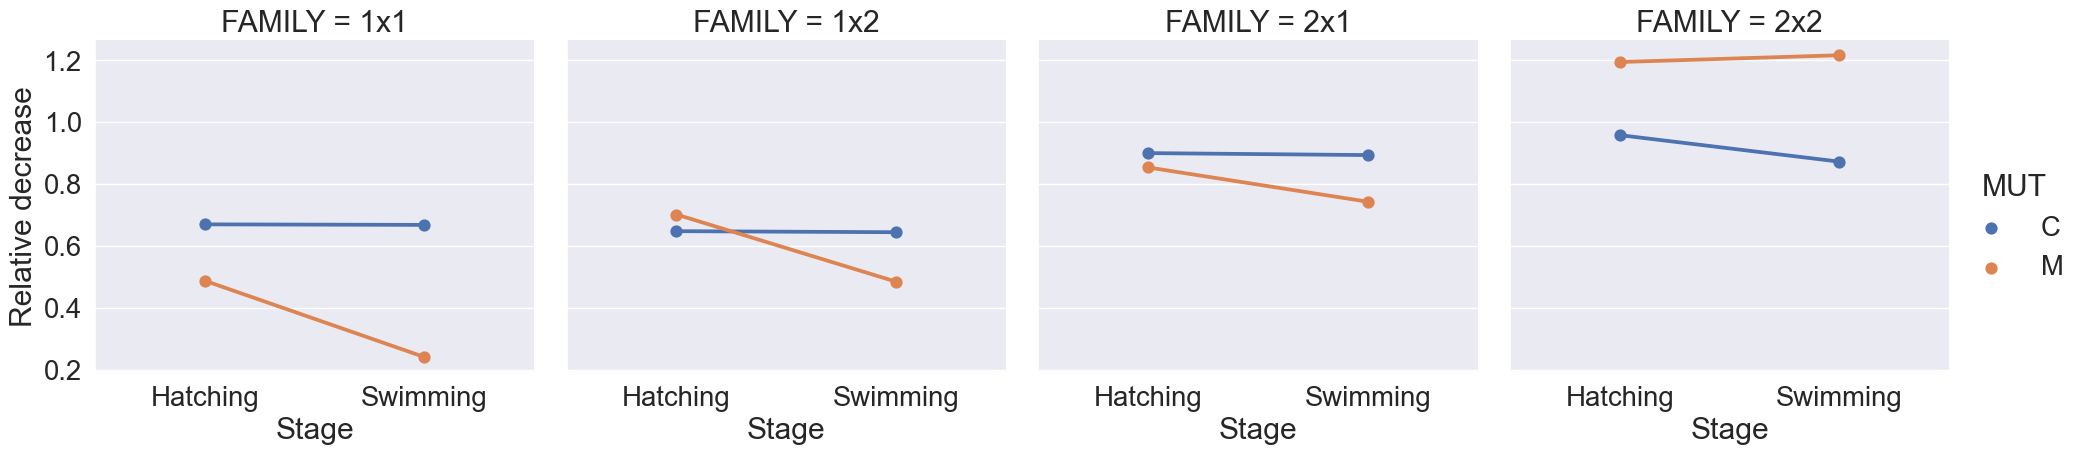

In [200]:
exp5lab_rd_plot = sns.catplot(data=exp5lab_rd, x='Stage', y='Relative decrease', hue='MUT', col='FAMILY',
                          kind="point")

#### AK version

In [162]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'EXP_5_main_lab'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
exp5main = pd.read_csv(url)

In [163]:
exp5main['FERT_PERC'] = exp5main['FERT_PERC'].str.replace(',', '.').map(float)
exp5main['SWIM_PERC'] = exp5main['SWIM_PERC'].str.replace(',', '.').map(float)

In [142]:
exp5main.columns

Index(['№', 'CODE', 'CUP_NUMBER', 'FEMALE', 'MALE', 'MUT', 'TEMP', 'TIME',
       'DEAD', 'FERT', 'FERT_NAME', 'TOTAL', 'FERT_PERC', 'SHOCK_DEAD',
       'SHOCK_ALIVE', 'SHOCK_NAME', 'HATCHED_DEAD', 'HATCHED_ALIVE',
       'HATCHED_NAME', 'SWIM', 'SWIM_NAME', 'SWIM_PERC', 'HATCHED_PERC'],
      dtype='object')

In [169]:
exp5main

,FAMILY,CUP_NUMBER,MUT,TEMP,TOTAL,FERT,FERT_PERC,SHOCK_ALIVE,HATCHED_ALIVE,HATCHED_PERC,SWIM,SWIM_PERC
0,1x1,1,C,C,42,37,88.095238,37,37,100.000000,33,89.189189
1,1x1,2,C,C,44,42,95.454545,41,40,95.238095,33,78.571429
2,1x1,3,C,C,38,33,86.842105,31,29,87.878788,26,78.787879
3,1x1,4,C,C,49,38,77.551020,37,35,92.105263,32,84.210526
4,1x2,1,C,C,62,58,93.548387,59,49,84.482759,45,77.586207
...,...,...,...,...,...,...,...,...,...,...,...,...
59,2x1,4,M,38,57,54,94.736842,53,50,92.592593,33,61.111111
60,2x2,1,M,38,42,40,95.238095,40,36,90.000000,34,85.000000
61,2x2,2,M,38,45,43,95.555556,40,36,83.720930,35,81.395349
62,2x2,3,M,38,58,58,100.000000,55,54,93.103448,50,86.206897


In [165]:
exp5main['FAMILY'] = exp5main['FEMALE'].map(str) + 'x' + exp5main['MALE'].map(str)
exp5main['HATCHED_PERC'] = exp5main['HATCHED_ALIVE'] / exp5main['FERT'] * 100

exp5main = exp5main[['FAMILY', 'CUP_NUMBER', 'MUT', 'TEMP', 'TOTAL', 'FERT', 'FERT_PERC', 'SHOCK_ALIVE', \
                     'HATCHED_ALIVE', 'HATCHED_PERC', 'SWIM', 'SWIM_PERC']]

In [179]:
exp5main_melted = pd.melt(exp5main, id_vars=['FAMILY', 'MUT', 'TEMP', 'CUP_NUMBER'], value_vars=['FERT_PERC', 'HATCHED_PERC', 'SWIM_PERC'], var_name='Stage', value_name='Percent')
exp5main_melted['HM'] = exp5main_melted['TEMP'].apply(lambda x: 'H-' if x == 'C' else 'H+') + \
                        exp5main_melted['MUT'].apply(lambda x: 'M-' if x == 'C' else 'M+')
exp5main_melted.loc[exp5main_melted['Stage'] == 'FERT_PERC', 'Percent'] = 100

def rename_stage(old_name):
    if old_name == 'FERT_PERC':
        return 'Fertilisation'
    elif old_name == 'HATCHED_PERC':
        return 'Hatching'
    elif old_name == 'SWIM_PERC':
        return 'Swimming'

exp5main_melted['Stage'] = exp5main_melted['Stage'].map(rename_stage)

In [180]:
exp5main_melted

,FAMILY,MUT,TEMP,CUP_NUMBER,Stage,Percent,HM
0,1x1,C,C,1,Fertilisation,100.000000,H-M-
1,1x1,C,C,2,Fertilisation,100.000000,H-M-
2,1x1,C,C,3,Fertilisation,100.000000,H-M-
3,1x1,C,C,4,Fertilisation,100.000000,H-M-
4,1x2,C,C,1,Fertilisation,100.000000,H-M-
...,...,...,...,...,...,...,...
187,2x1,M,38,4,Swimming,61.111111,H+M+
188,2x2,M,38,1,Swimming,85.000000,H+M+
189,2x2,M,38,2,Swimming,81.395349,H+M+
190,2x2,M,38,3,Swimming,86.206897,H+M+


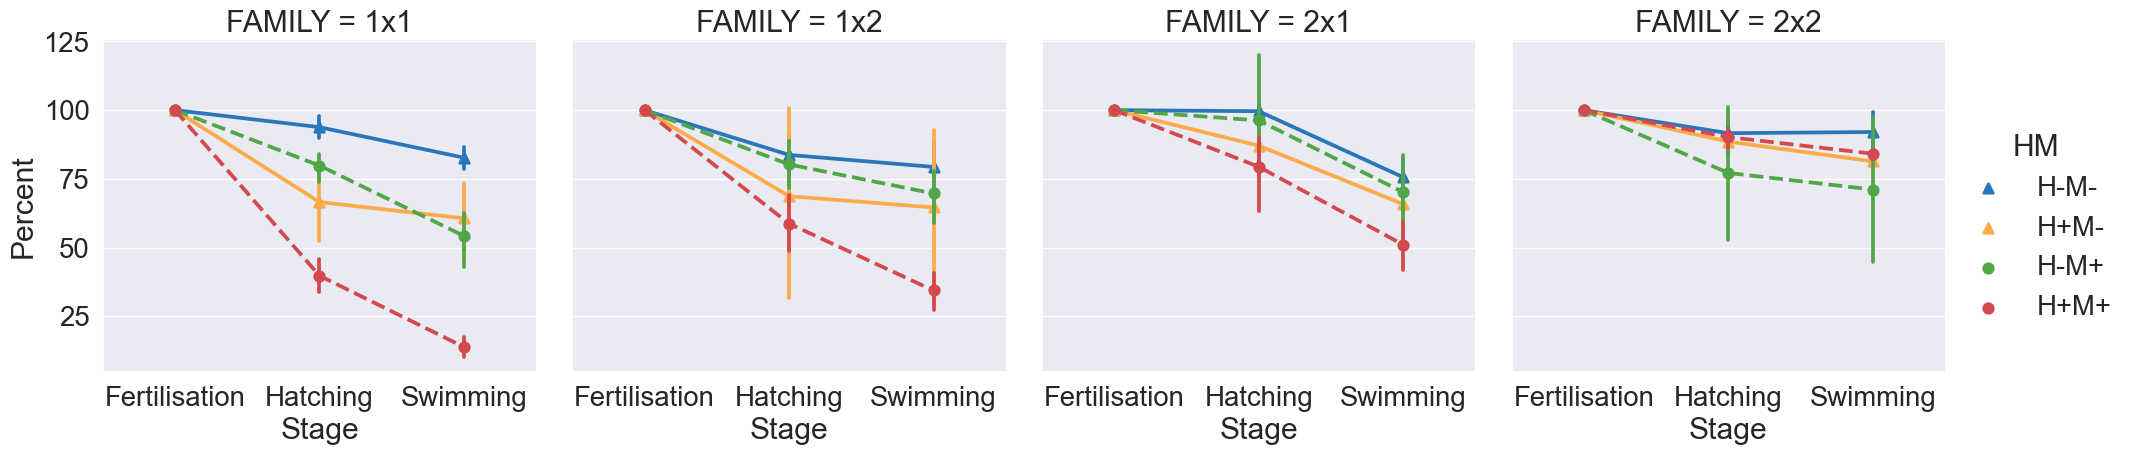

In [325]:
sns.set_style('darkgrid')
exp5main_plot_with_whiskers = sns.catplot(data=exp5main_melted, x='Stage', y='Percent', hue='HM', col='FAMILY',
                           hue_order=['H-M-', 'H+M-', 'H-M+', 'H+M+'],
                          kind="point", linestyles=["-", "-", "--", '--'], markers=['^', '^', 'o', 'o'], 
                          palette={'H-M-': '#2976bb', 'H+M-': '#fdaa48', 'H-M+': '#50a747', 'H+M+': '#d3494e'})

In [136]:
exp5main['hatched_fraction_H+'] = exp5main['hH+'] / exp5main['fH+'] * 100
exp5main['hatched_fraction_H-'] = exp5main['hH-'] / exp5main['fH-'] * 100
exp5main['swim_fraction_H+'] = exp5main['sH+'] / exp5main['fH+'] * 100
exp5main['swim_fraction_H-'] = exp5main['sH-'] / exp5main['fH-'] * 100

## Exp8fac (2)

In [287]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'exp8_relativeDecrease'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
exp8fac = pd.read_csv(url)

In [280]:
exp8fac

,Group,Temp,Time,fH+,sH+,fH-,sH-,RelativeDecreaseSwimming
0,M-,38,40,274053,87000,274053,120000,0.725
1,M+,38,40,339140,8000,339140,40000,0.200


In [288]:
exp8fac['Group'] = exp8fac['Group'].str.replace('M', 'M+').str.replace('C', 'M-')

exp8fac['H+_fraction'] = exp8fac['sH+'] / exp8fac['fH+'] * 100
exp8fac['H-_fraction'] = exp8fac['sH-'] / exp8fac['fH-'] * 100


In [298]:
exp8fac_melted = pd.melt(exp8fac, id_vars=['Group'], value_vars=['H+_fraction', 'H-_fraction'], var_name='Code', value_name='Percent')
exp8fac_melted['Heat_shock'] = exp8fac_melted['Code'].apply(lambda x: x[0:2])
exp8fac_melted['HM'] = exp8fac_melted['Heat_shock'] + exp8fac_melted['Group']

exp8fac_melted_dup = pd.DataFrame(np.repeat(exp8fac_melted.values, 2, axis=0))
exp8fac_melted_dup.columns = exp8fac_melted.columns
exp8fac_melted_dup['Stage']=np.where(exp8fac_melted_dup.index%2==0, 'Fertilisation', 'Hatching')
exp8fac_melted_dup.loc[exp8fac_melted_dup['Stage'] == 'Fertilisation', 'Percent'] = 100

In [302]:
exp8fac_melted_dup

,Group,Code,Percent,Heat_shock,HM,Stage
0,M-,H+_fraction,100,H+,H+M-,Fertilisation
1,M-,H+_fraction,31.745684,H+,H+M-,Hatching
2,M+,H+_fraction,100,H+,H+M+,Fertilisation
3,M+,H+_fraction,2.358908,H+,H+M+,Hatching
4,M-,H-_fraction,100,H-,H-M-,Fertilisation
5,M-,H-_fraction,43.787151,H-,H-M-,Hatching
6,M+,H-_fraction,100,H-,H-M+,Fertilisation
7,M+,H-_fraction,11.794539,H-,H-M+,Hatching


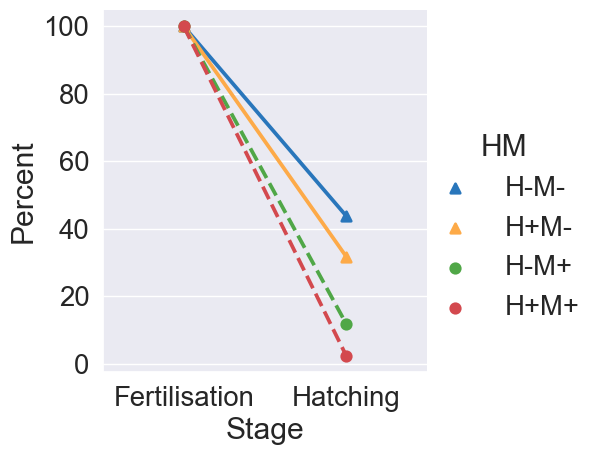

In [324]:
sns.set_style('darkgrid')
exp8fac_plot_with_whiskers = sns.catplot(data=exp8fac_melted_dup, 
                                         x='Stage', y='Percent', hue='HM',
                                         hue_order=['H-M-', 'H+M-', 'H-M+', 'H+M+'], 
                                         kind="point", linestyles=["-", "-", "--", '--'], markers=['^', '^', 'o', 'o'],
                                        palette={'H-M-': '#2976bb', 'H+M-': '#fdaa48', 'H-M+': '#50a747', 'H+M+': '#d3494e'})

#### Relative decrease

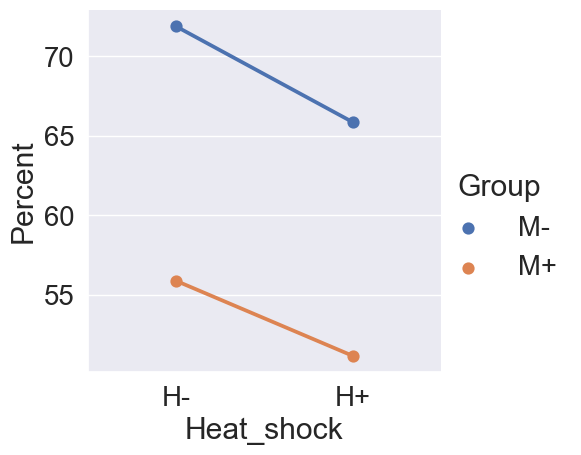

In [306]:
sns.set_style('darkgrid')
exp8fac_plot = sns.catplot(data=exp8fac_melted_dup, 
                           x='Heat_shock', y='Percent', hue='Group',
                           kind="point", order=['H-', 'H+'], errorbar=None)